In [13]:
from qiskit import *
from qiskit.circuit.library import MCXGate, RXGate, RZZGate
from qiskit_aer import Aer, AerSimulator, StatevectorSimulator, QasmSimulator
from IPython.core.display import Latex
from qiskit.circuit import Parameter
from qiskit.circuit.library.standard_gates import RXGate, RYGate, RZGate, RZZGate
from sympy.physics.quantum import TensorProduct
from sympy import Matrix
import numpy as np

In [4]:
def adjacency_matrix(V, edges):
    # Initialize an empty V x V matrix with all zeros
    matrix = [[0] * V for _ in range(V)]
    
    # Populate the matrix based on the edges
    for edge in edges:
        u, v = edge
        matrix[u][v] = 1
        matrix[v][u] = 1  # Undirected graph
    
    return np.array(matrix)

In [11]:
'Distance Matrix'
D = np.array([[0, 3, 4, 5],
                            [3, 0, 1, 3],
                             [4, 1, 0, 6],
                             [4, 3, 6, 0]])

'Number of Nodes'
V = 4
edges = [(0, 1), (1, 2), (2, 3), (3, 0)]

'Adjacency matrix'
A = adjacency_matrix(V, edges)

'Affinity matrix'
K = TensorProduct(A, D)
MCRX=RXGate(0.5).control(6, ctrl_state='000000')

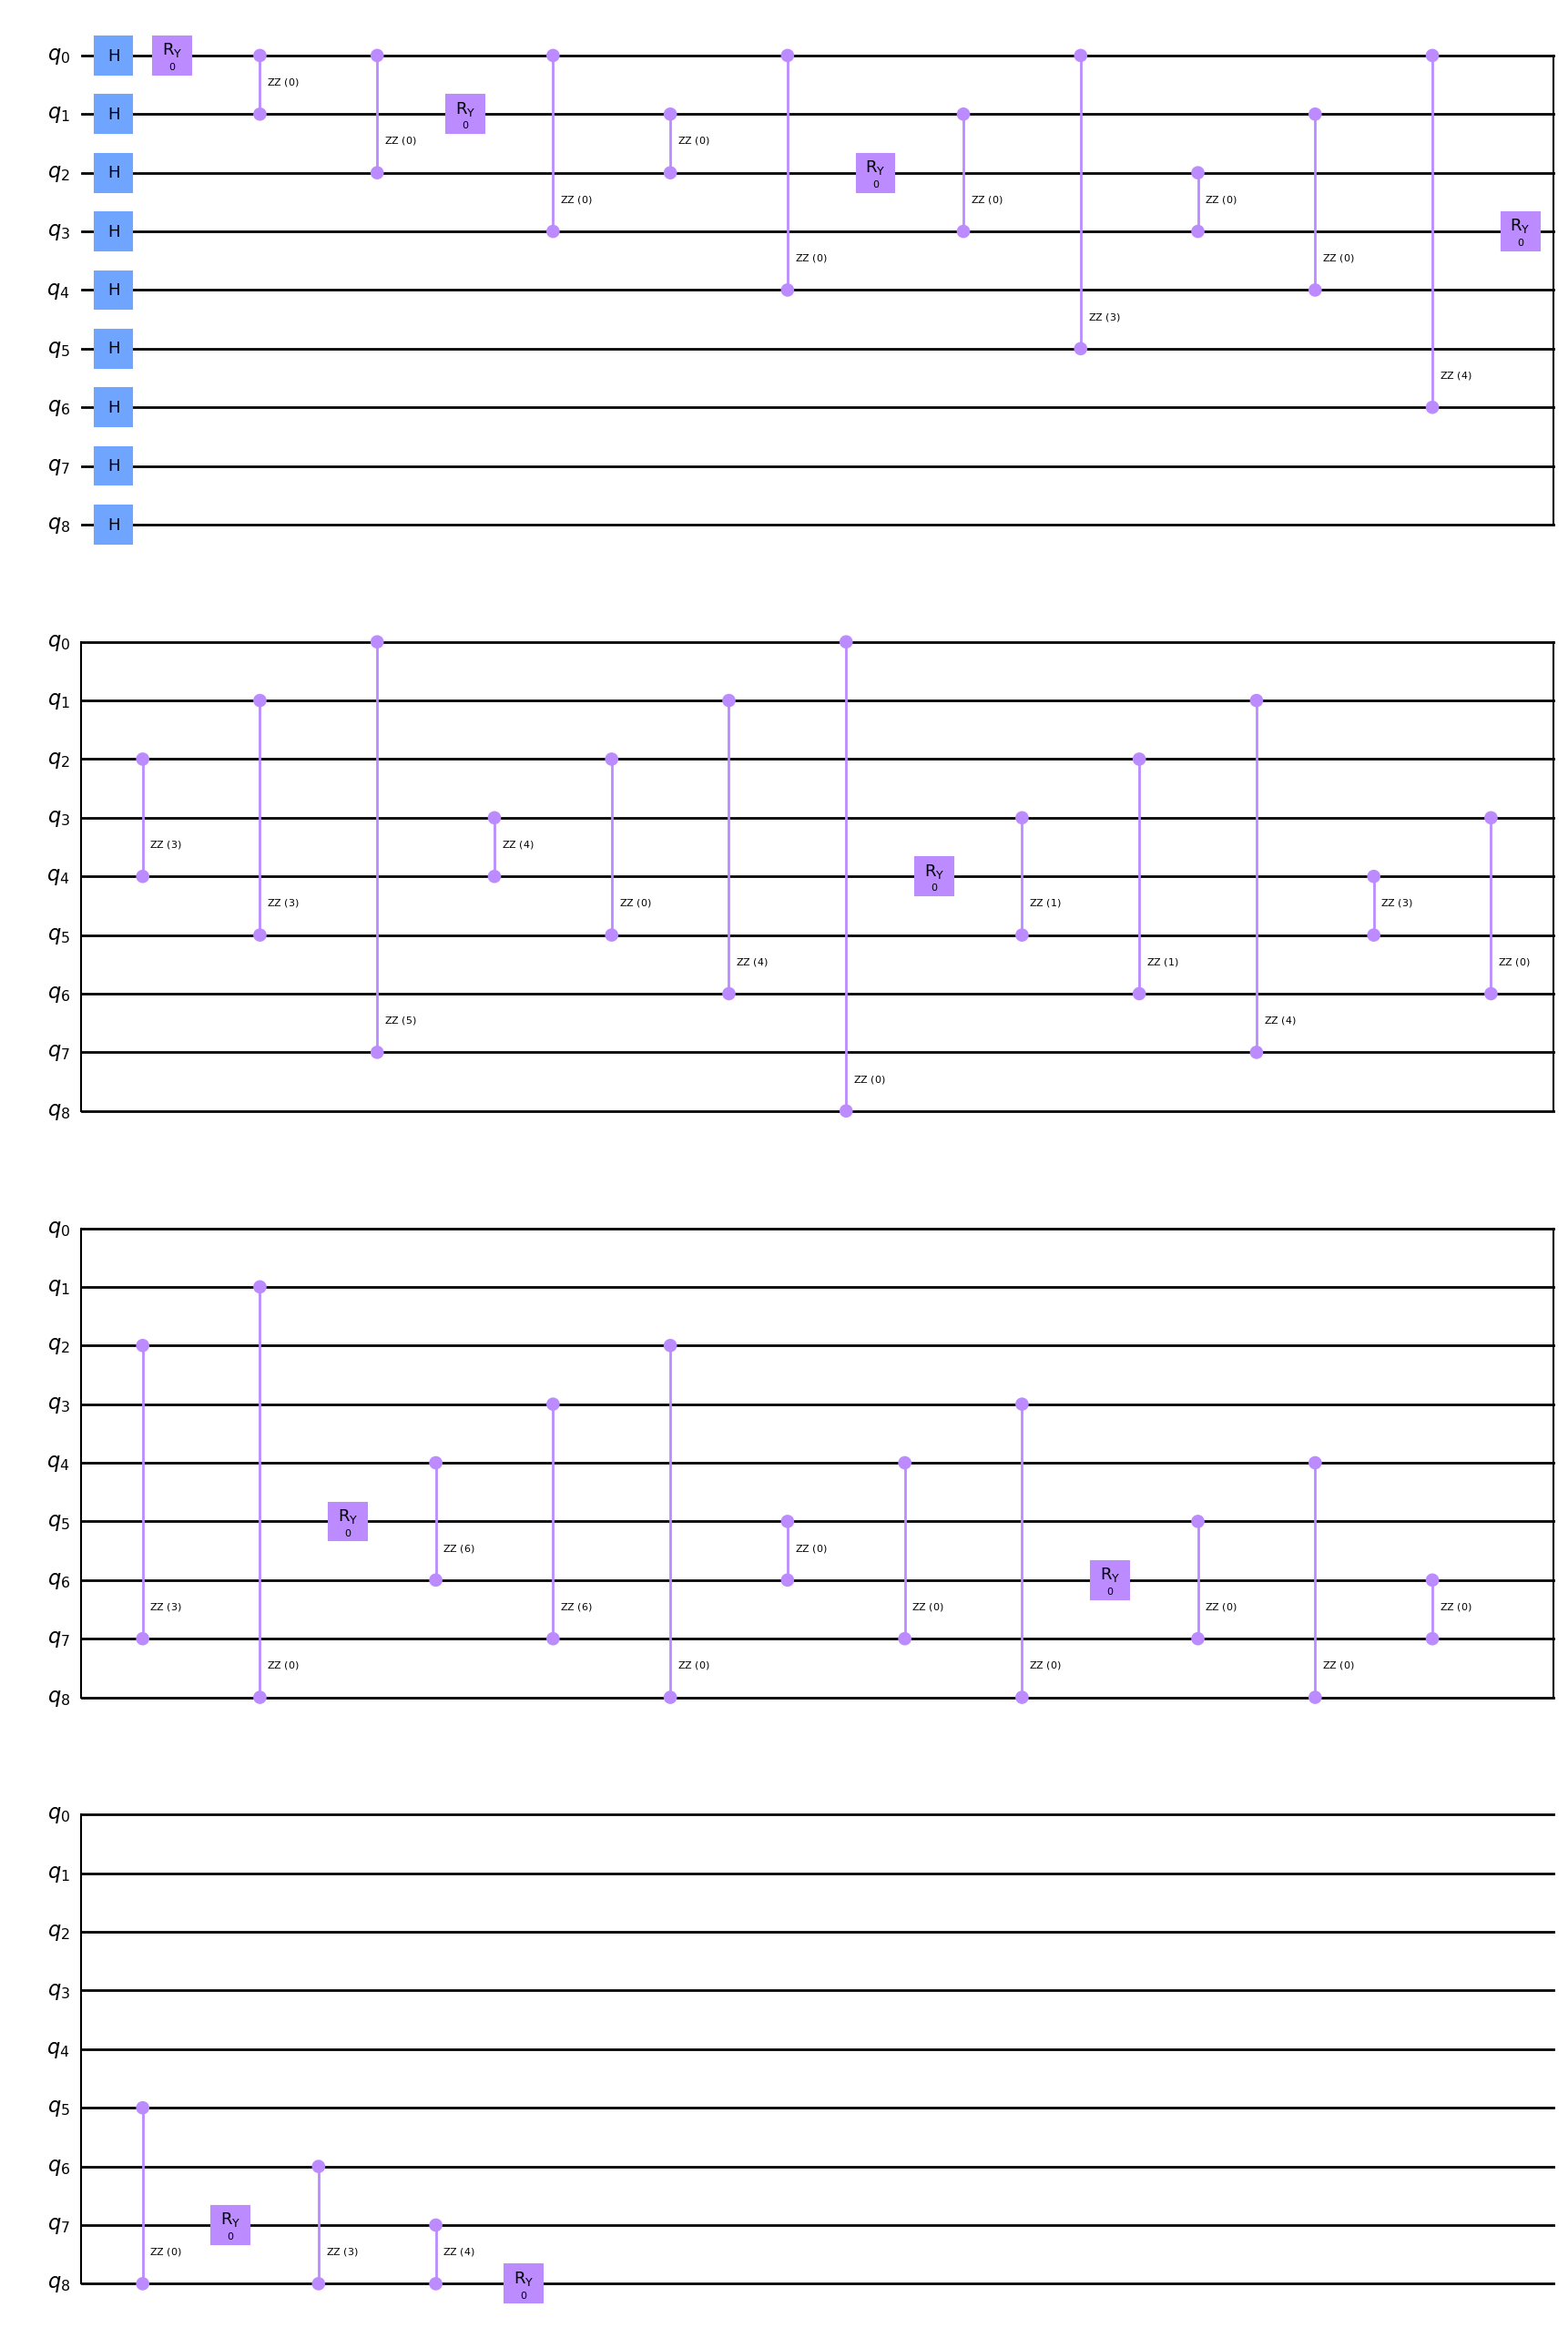

In [25]:
qc = QuantumCircuit(V*V)

qc.h([i for i in range(V*V)])
for i in range(V*V):
    a = 1
    for j in range(V*V):
        if i == j:
            qc.ry(K[i][j], i)
        elif i != j and i != a:
            qc.append(RZZGate(K[i][j]), [i, a])
            a += 1
    a += 1

# qc.barrier()
qc.draw('mpl')

In [26]:
!git pull origin main

Updating fe8005d..ee290c8


From https://github.com/Sajjad-Ahmad-phy/Final-Year-Project
 * branch            main       -> FETCH_HEAD
   fe8005d..ee290c8  main       -> origin/main
error: Your local changes to the following files would be overwritten by merge:
	.ipynb_checkpoints/TSP-4 QNN-checkpoint.ipynb
	Encoding Layer.ipynb
	TSP-4 QNN.ipynb
Please commit your changes or stash them before you merge.
Aborting


In [27]:
!git add .
!git commit -m "Your commit message"

[main 55ffd1a] Your commit message
 13 files changed, 3434 insertions(+), 205 deletions(-)
 create mode 100644 .ipynb_checkpoints/Practice-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/TSP-4 QNN-whole data-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/TSP-5 QNN-checkpoint.ipynb
 create mode 100644 Practice.ipynb
 create mode 100644 TSP-4 QNN-whole data.ipynb
 create mode 100644 TSP-5 QNN.ipynb


In [28]:
!git push -u origin main

To https://github.com/Sajjad-Ahmad-phy/Final-Year-Project.git
 ! [rejected]        main -> main (non-fast-forward)
error: failed to push some refs to 'https://github.com/Sajjad-Ahmad-phy/Final-Year-Project.git'
hint: Updates were rejected because the tip of your current branch is behind
hint: its remote counterpart. Integrate the remote changes (e.g.
hint: 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.
